# An example of K-Means++ initialization

K-Means++ is used as the default initialization for K-means. This is an example modified from scikit-learn to show the output of the sklearn.cluster.kmeans_plusplus function for generating initial seeds for clustering. In this example, the standard deviation of the sample data is large enough to see differences in true labels and the result from K-mean.

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
n_samples = 4000
n_components = 4

X, y_true = make_blobs(n_samples=n_samples,
                       centers=n_components,
                       cluster_std=0.90,
                       random_state=0)

In [2]:
[(X[i],y_true[i]) for i in range(10)]

[(array([-1.49891947,  2.32872333]), 2),
 (array([-2.80529619,  7.28462713]), 3),
 (array([0.06023055, 1.70193962]), 2),
 (array([-1.12044242,  6.75471859]), 3),
 (array([-0.64575982,  9.12676592]), 3),
 (array([-1.69118701,  9.05860148]), 3),
 (array([-0.42321596,  6.85923123]), 3),
 (array([1.22064089, 1.69716864]), 1),
 (array([0.55389042, 5.09191344]), 0),
 (array([0.52874938, 1.55482884]), 1)]

k, col =  0 , #4EACC5
k, col =  1 , #FF9C34
k, col =  2 , #4E9A06
k, col =  3 , m
cluster_data =  [False  True False ... False False False]


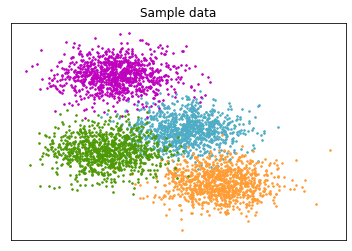

In [3]:
# Plot sample data
plt.figure(1)
colors = ['#4EACC5', '#FF9C34', '#4E9A06', 'm']

for k, col in enumerate(colors):
    print('k, col = ',k,',',col)
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1],
                c=col, marker='.', s=10)
print('cluster_data = ',cluster_data)

plt.title("Sample data")
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
# Calculate seeds from kmeans++
centers_init, indices = kmeans_plusplus(X, n_clusters=4,random_state=0)
centers_init, indices

(array([[-1.15497364,  1.94318754],
        [-0.79847504,  8.0373572 ],
        [ 0.77443704,  4.03176257],
        [ 1.29702247,  0.74051137]]),
 array([2732, 3378, 2510, 1119]))

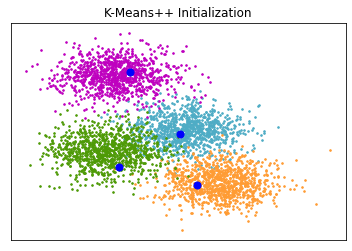

In [5]:
# Plot init seeds along side sample data
plt.figure(1)
colors = ['#4EACC5', '#FF9C34', '#4E9A06', 'm']

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1],
                c=col, marker='.', s=10)

plt.scatter(centers_init[:, 0], centers_init[:, 1], c='b', s=50)
plt.title("K-Means++ Initialization")
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
# Fit K-mean model
estimators = KMeans(n_clusters=4, init='k-means++')
estimators.fit(X)

KMeans(n_clusters=4)

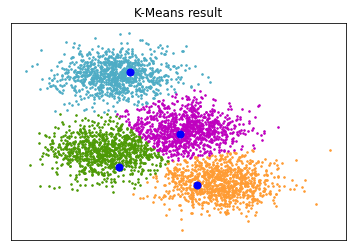

In [7]:
# Plot the result from the K-mean model
plt.figure(1)
labels = estimators.labels_

colors = ['#4EACC5', '#FF9C34', '#4E9A06', 'm']

for k, col in enumerate(colors):
    cluster_data = labels == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1],
                c=col, marker='.', s=10)

plt.scatter(centers_init[:, 0], centers_init[:, 1], c='b', s=50)
plt.title("K-Means result")
plt.xticks([])
plt.yticks([])
plt.show()

There are clear boundaries between the result from K-mean